In [64]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
sns.set_style("whitegrid")

In [65]:
train_path = './data2/foo/main_data_test/train/'
test_path = './data2/foo/main_data_test/test/'
val_path = './data2/foo/main_data_test/valid/'

In [66]:
category_names = os.listdir(train_path)
category_names

['hammer', 'plirs', 'rope', 'screwdriver', 'wrench']

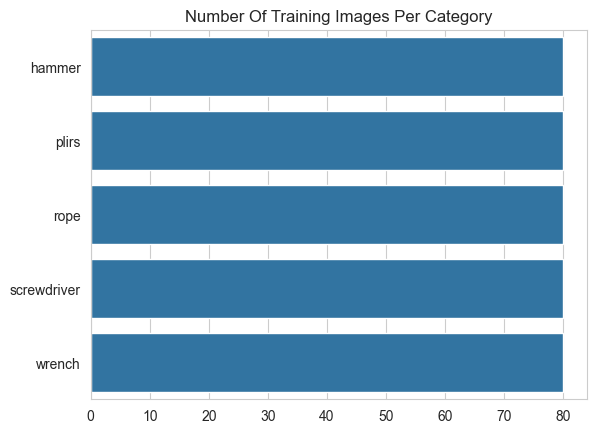

In [67]:
nb_categories = len(category_names) 
train_images = []
for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))

sns.barplot( x=train_images, y=category_names).set_title("Number Of Training Images Per Category");

Text(0.5, 1.0, 'Number Of Validation Images Per Category')

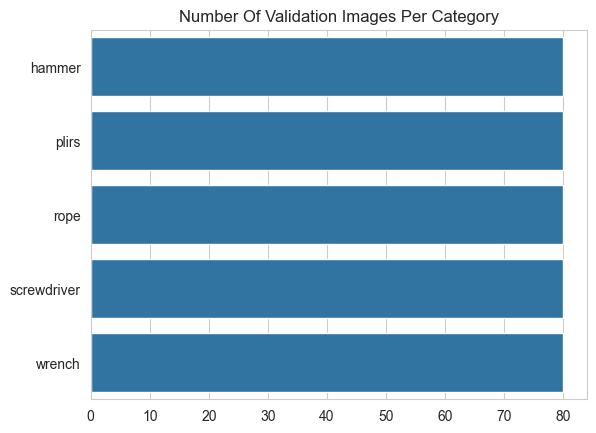

In [68]:
val_images = []
for category in category_names:
    folder = val_path + "/" + category
    val_images.append(len(os.listdir(folder)))

sns.barplot(x=train_images, y=category_names).set_title("Number Of Validation Images Per Category")

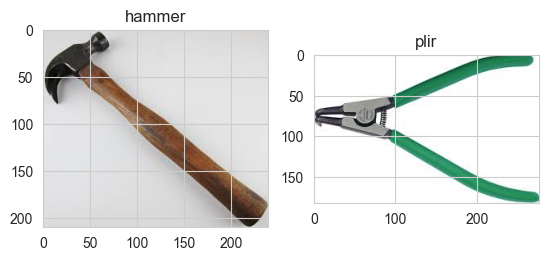

In [69]:
train_hammer = './data2/foo/main_data_test/train/hammer'
train_plirs = './data2/foo/main_data_test/train/plirs'
img1 = implt.imread(train_hammer + "/hammer (1).jpg")
img2 = implt.imread(train_plirs + "/plir (1).jpg")

plt.subplot(1, 2, 1)
plt.title('hammer')
plt.imshow(img1)       
plt.subplot(1, 2, 2)
plt.title('plir')
plt.imshow(img2)
plt.show()

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    directory=train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  
)

validation_generator = datagen.flow_from_directory(
        val_path,
        target_size=(256, 256),
        shuffle=True,
        class_mode='categorical')

Found 400 images belonging to 5 classes.


Found 75 images belonging to 5 classes.


In [71]:

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(256,256, 3))

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

base_model.trainable = False 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,765 (72.14 MB)

 Trainable params: 4,195,077 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [73]:
history = model.fit(
      train_generator,
      steps_per_epoch=15,  
      epochs=10,
      verbose=1,
      validation_data=validation_generator)

c:\Users\Mr.Ghost\Desktop\AI TEAM PROJECT\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.3751 - loss: 27.7728 

C:\Users\Mr.Ghost\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.3921 - loss: 26.3861 - val_accuracy: 0.6933 - val_loss: 1.8002
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.6624 - loss: 1.6298 - val_accuracy: 0.6133 - val_loss: 0.8195
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.7245 - loss: 0.7834 - val_accuracy: 0.7200 - val_loss: 0.5678
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.7467 - loss: 0.7023 - val_accuracy: 0.8533 - val_loss: 0.5456
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.8020 - loss: 0.5695 - val_accuracy: 0.8933 - val_loss: 0.5038
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.8733 - loss: 0.4021 - val_accuracy: 0.8533 - val_loss: 0.4818
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.7915 - loss: 0.5560 - val_accuracy: 0.9200 - val_loss: 0.3262
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.8939 - loss: 0.3596 - val_accuracy: 0.8800 - val_loss: 0.4907
Ep

In [74]:
# Creating a path variable:
path = f'{val_path}/'
path='./data2/foo/main_data_test/valid/plirs/plir (10).jpg'

# Loading the image and resizes
img = image.load_img(path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [75]:
model.save('image_classification_model.keras')

In [22]:

# Load the saved model
model = load_model('image_classification_model.keras')


In [23]:
print(model.input_shape)


(None, 256, 256, 3)


In [59]:

img_path = './data2/foo/main_data_test/test/hammer/hammer (97).jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256,256))  # Ensure the size matches what the model expects

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Rescale the image (if your model was trained on rescaled images)
# img_array /= 256.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted class: 0


In [61]:
x = train_generator.class_indices
x

{'hammer': 0, 'plirs': 1, 'rope': 2, 'screwdriver': 3, 'wrench': 4}

In [62]:
key = list(x.keys())
predicted_label = key[predicted_class]
print(f'Predicted label: {predicted_label}')

Predicted label: hammer


In [63]:
# predicted_label = x[predicted_class]
# print(f'Predicted label: {predicted_label}')